# Стратегия удержания клиентов в сети фитнес-центров

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Задача: провести анализ и подготовить план действий по удержанию клиентов.

Цели проекта:

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

Вывод: 

Самые стабильные клиенты фитнес-центра те, у которых фитнес-центр находится недалеко от работы (дома) (возможно сотрудники компаний-партнеров фитнес-центра, или пришедшие по рекомендации в раках акции "Приведи друга"), купившие абонемент на срок от 5 месяцев до года, посещающие тренировки (в том числе групповые) не реже двух раз в неделю, а также пользующиеся сопутствующими услугами: массажом, сауной и т.п. Также необходимо отметить лояльность клиентов - то есть если клиент не прекратил посещение фитнес-центра в первые два месяца, то с большой долей вероятнтсти он будет продолжать ходить на тренировки.


Рекомендации:

Возможно для привлечения стабильных клиентов фитнес-центру нужно провести рекламную кампанию среди жителей окрестных домов, кварталов, ближайших офисных центров: для жилых домов это скорее флаеры в почту, для офисных центров - адресные предложения сотрудникам компаний.

Также порекомендовала бы провести опрос клиентов для понимания что влияет на их решение продожать\не продолжать заниматься после первых пары месяцев посещения: возможно нехватает каких-то групповых тренировок или стоит немного поменять график занятий чтобы клиентам было комфортно добираться с работы на тренировки, или наоблорот после тренировок домой.

Исследование проводится на полученных от заказчика данных, которые содержат информацию на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

'Churn' — факт оттока в текущем месяце;

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Автор: Екатерина Затирка, студент 25 когорты DA.

# Содержание

1. [Исследовательский анализ данных](#eda)
    * [Вывод](#resume)
2. [Построение моделей прогнозирования оттока клиентов](#models)
    * [Вывод](#resume1)
3. [Кластеризация клиентов](#cluster)
    * [Вывод](#resume2)

<a id='eda'></a> 

## Исследовательский анализ данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
server_path = '/datasets/gym_churn.csv'
filename = 'rest_data.csv'
try:
    gym_churn = pd.read_csv(server_path)
except: 
    gym_churn = pd.read_csv(filename)

print(gym_churn.shape)    
print(gym_churn.info())
display(gym_churn.head())

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


В полученных данных 14 признаков и 4000  наблюдений. Все признаки численные, проведена бинарная замена категориальных признаков. Пропущенных значений нет.

In [4]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Мужчин и женщин в фитнес-центр ходит примерно поровну, для большинства клиентов фитнес-центр расположен вблизи от дома\места работы. Почти половина клиентов являются сотрудниками партнера фитнес-клуба или пришли в рамках акции "Приведи друга". 

Длительность действующего абонемента составляет от 1 до 12 месяцев, в среднем - 4 с половиной месяца. Практически половина клиентов посещают групповые занятия. Средний возраст клиентов 29 лет (от 18 до 41). 

Среднее количество месяцев до конца абонемента - 4 месяца, среднее количество посещений в неделю за все время посещения фитнес-центра - 1.87, среднее количество посещений в неделю за последний месяц - 1.76. Но при этом есть клиенты, которые ходят по 6 раз в неделю, так что стандартное отклонение меньше.

In [5]:
churn = gym_churn.groupby('Churn').agg({'gender':'mean',
                                        'Near_Location':'mean',
                                        'Partner':'mean',
                                        'Promo_friends':'mean',
                                        'Phone':'mean',
                                        'Contract_period':'mean',
                                        'Group_visits':'mean',
                                        'Age':'mean', 
                                        'Avg_additional_charges_total':'mean', 
                                        'Month_to_end_contract':'mean', 
                                        'Lifetime':'mean',
                                        'Avg_class_frequency_total':'mean',
                                        'Avg_class_frequency_current_month':'mean'}).reset_index()
display(churn)

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


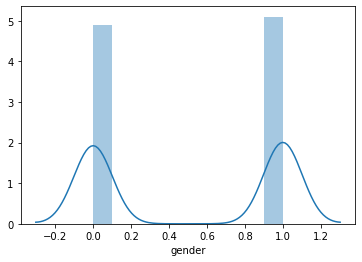

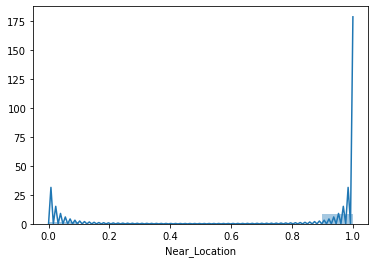

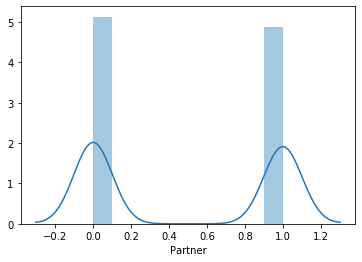

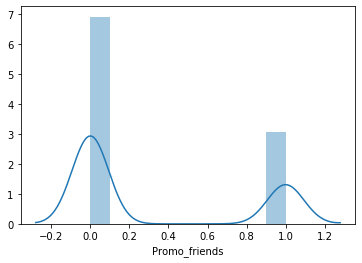

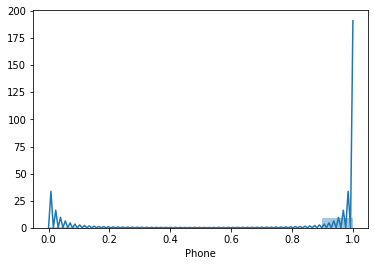

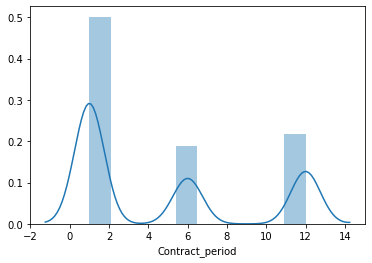

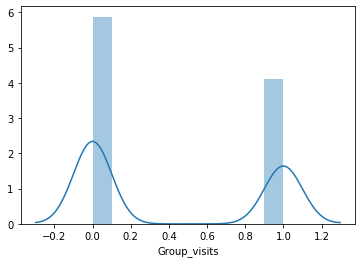

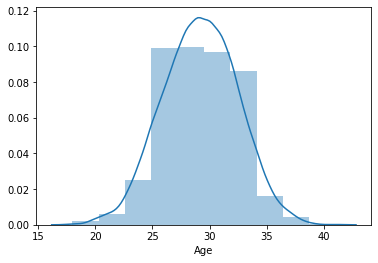

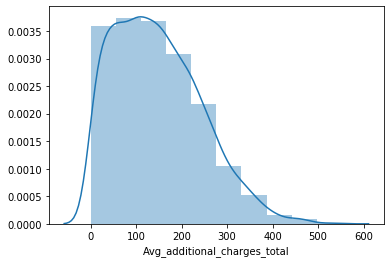

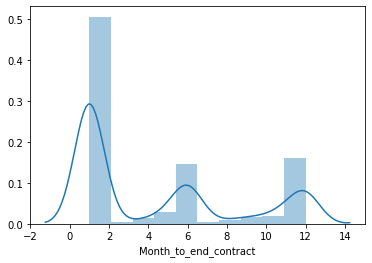

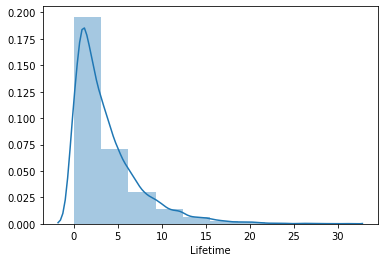

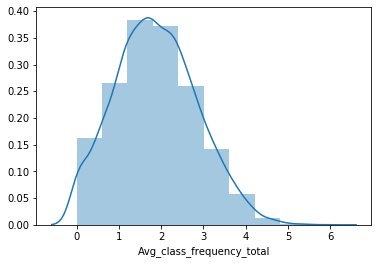

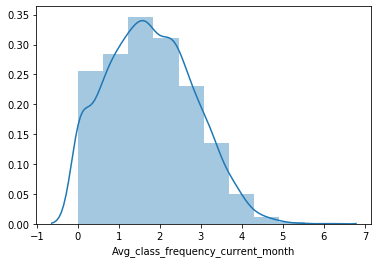

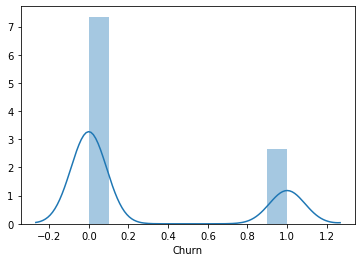

In [6]:
for feature in gym_churn.query('Churn == 0').columns:
    sns.distplot(gym_churn[feature], bins=10)
    plt.show() 

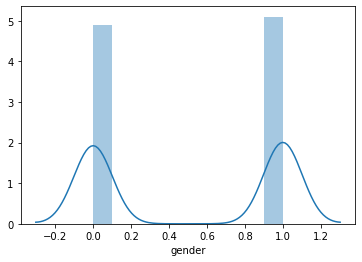

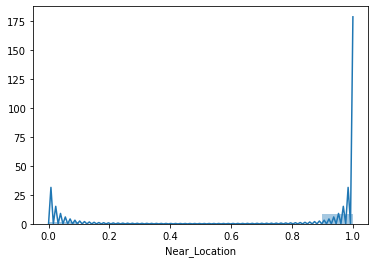

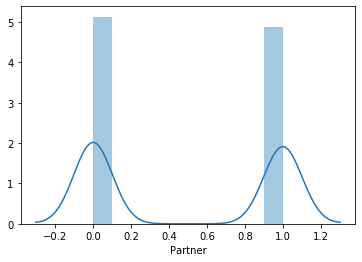

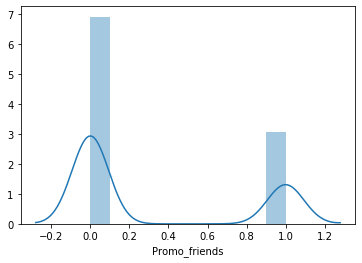

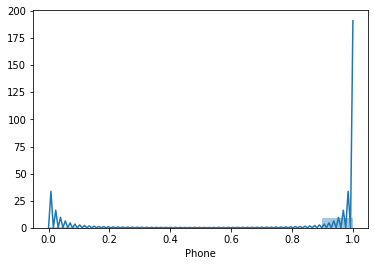

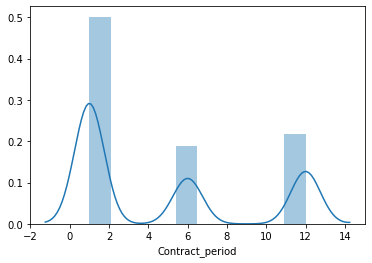

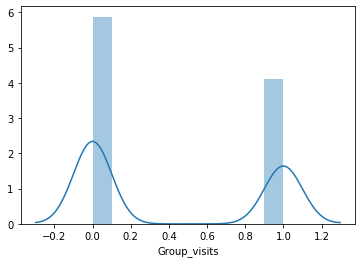

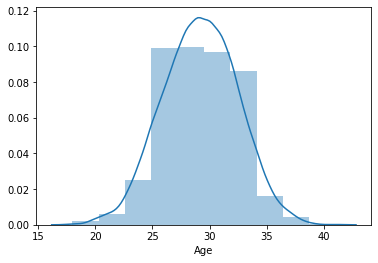

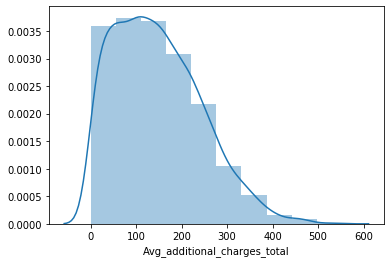

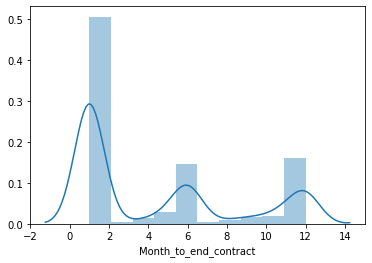

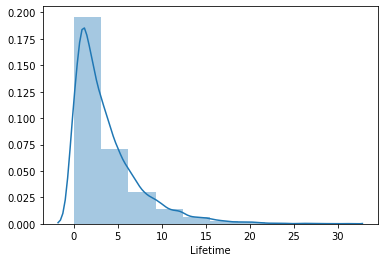

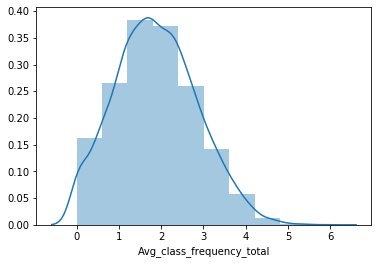

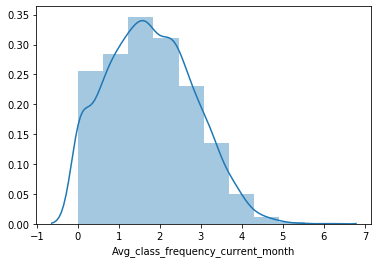

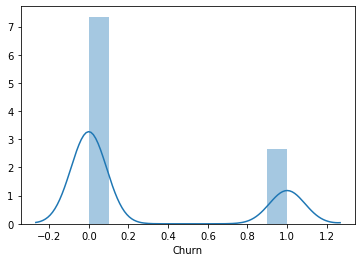

In [7]:
for feature in gym_churn.query('Churn == 1').columns:
    sns.distplot(gym_churn[feature], bins=10)
    plt.show() 

В среднем среди клиентов, переставших ходить в фитнес-центр меньше сотрудников компаний-партнеров и меньше тех, кто пришел по промокоду в рамках акции "Приведи друга". Среди клиентов, попавших в отток более короткие абонементы, чем у тех кто продолжил ходить, они меньше посещают групповые занятия и, в среднем, реже посещают фитнес-центр (один раз в неделю, а не два).

Также большинство клиентов перестает посещать фитнес-центр в среднем в первый месяц.

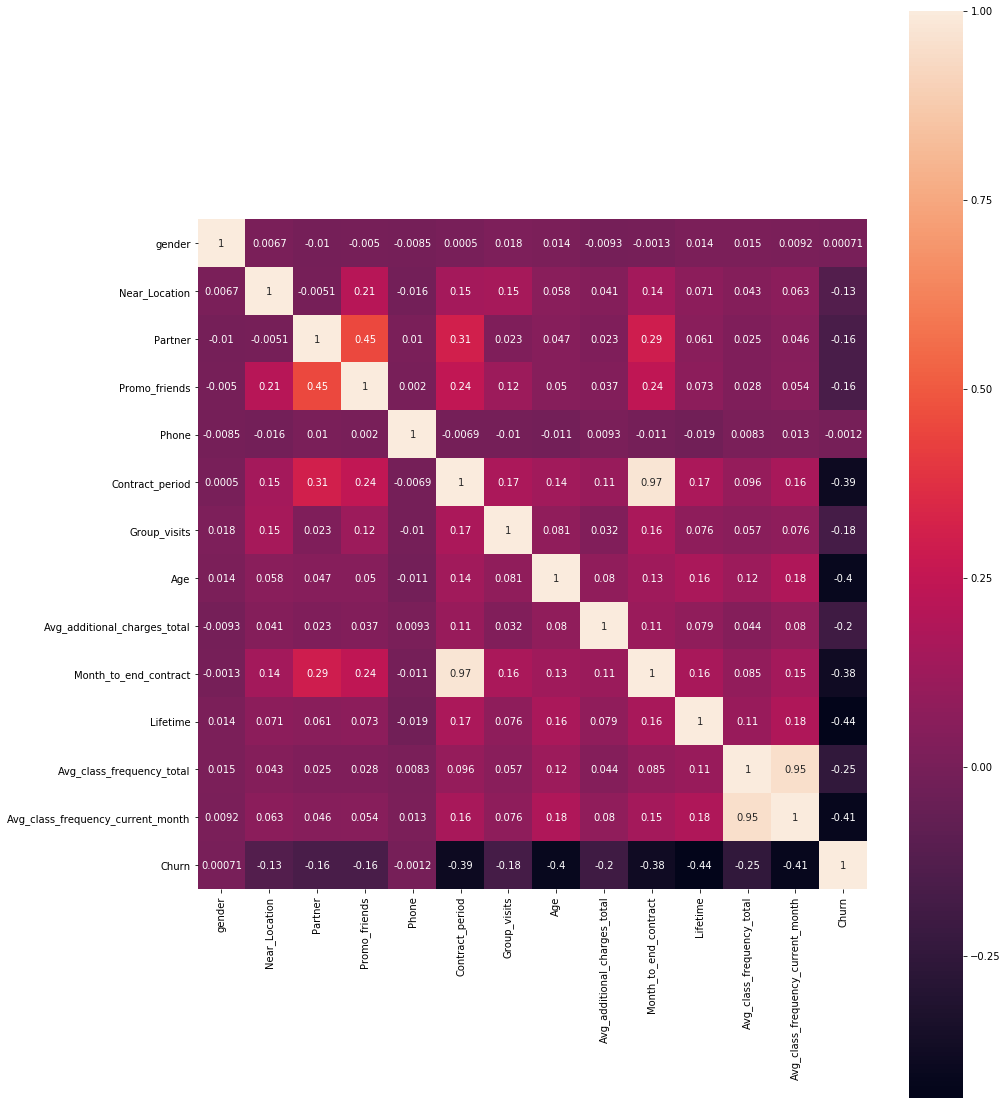

In [8]:
cm = gym_churn.corr()
plt.figure(figsize=(15, 20))
sns.heatmap(cm, annot = True, square=True)
plt.show()

Тепловая карта матрицы корреляций не показывает сильной корреляции признаков между собой за исключением того, что клиент является сотрудником компании-партнера и пришел в рамках акции "приведи друга". Корреляция этих признаков составляет 45% (не исключено, что компаниям-партнерам выдают промокоды для привлечения их сотрудников в фитнес-центр).

Отрицательную корреляцию в районе 40% с целевой переменной (отток) показывают следующие признаки: время, прошедшее с первого посещения клиентом фитнес-центра, частота посещений фитнес-центра в неделю за последний месяц, возраст, длительность абонемента.

<a id='resume'></a> 

### Вывод
В среднем среди клиентов, переставших ходить в фитнес-центр меньше сотрудников компаний-партнеров и меньше тех, кто пришел по промокоду в рамках акции "Приведи друга". Среди клиентов, попавших в отток более короткие абонементы, чем у тех кто продолжил ходить, они меньше посещают групповые занятия и, в среднем, реже посещают фитнес-центр (один раз в неделю, а не два).

Также большинство клиентов перестает посещать фитнес-центр в среднем в первый месяц.

Тепловая карта матрицы корреляций не показывает сильной корреляции признаков между собой за исключением того, что клиент является сотрудником компании-партнера и пришел в рамках акции "приведи друга". Корреляция этих признаков составляет 45% (не исключено, что компаниям-партнерам выдают промокоды для привлечения их сотрудников в фитнес-центр).

Отрицательную корреляцию в районе 40% с целевой переменной (отток) показывают следующие признаки: время, прошедшее с первого посещения клиентом фитнес-центра, частота посещений фитнес-центра в неделю за последний месяц, возраст, длительность абонемента.

<a id='models'></a> 

## Построение моделей прогнозирования оттока клиентов.

In [9]:
X = gym_churn.drop('Churn', axis=1)
y = gym_churn['Churn']

Разделила данные на признаки (матрица X) и целевую переменную (y).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Разделила модель на обучающую и валидационную выборки.

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучила StandartScaler на обучающей выборке, преобразовала обучающий и валидационные наборы данных.

In [12]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Задала для модели алгоритм логистической регрессии, обучила модель на обучающей выборке.

In [13]:
predictions_LR = model_LR.predict(X_test_st)
probabilities_LR = model_LR.predict_proba(X_test_st)[:, 1]

Сделала прогнозы на валидационной выборке.

In [14]:
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Задала для модели алгоритм случайного леса, обучила модель на обучающей выборке.

In [15]:
predictions_RF = model_RF.predict(X_test_st)
probabilities_RF = model_RF.predict_proba(X_test_st)[:, 1]

Сделала прогнозы на валидационной выборке.

In [16]:
print('Метрики классификации для модели логистической регрессии')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions_LR)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions_LR)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions_LR)))
print('\tF1: {:.2f}'.format(f1_score(y_test, predictions_LR)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_LR)))

Метрики классификации для модели логистической регрессии
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98


In [17]:
print('Метрики классификации для модели случайного леса')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions_RF)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions_RF)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions_RF)))
print('\tF1: {:.2f}'.format(f1_score(y_test, predictions_RF)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_RF)))

Метрики классификации для модели случайного леса
	Accuracy: 0.92
	Precision: 0.89
	Recall: 0.79
	F1: 0.83
	ROC_AUC: 0.96


<a id='resume1'></a> 

### Вывод
Сделала прогнозы оттока клиентов используя алгоритм логистической регрессии (бинарной классификации) и алгоритм случайного леса.

Доля правильных ответов при использовании логистической регрессии составляет 0.92, при использовании случайного леса - 0.91.

Точность при использовании логистической регрессии составляет 0.85, при использовании случайного леса - 0.83.

Полнота при использовании логистической регрессии составляет 0.83, при использовании случайного леса - 0.78.

Сводная метрика при использовании логистической регрессии составляет 0.87, при использовании случайного леса - 0.83.

Метрика площади под кривой ошибок при использовании логистической регрессии составляет 0.98, при использовании случайного леса - 0.96.

Можно сказать, что модель логистической регрессии отработала прогноз лучше.

<a id='cluster'></a> 

## Кластеризация клиентов

In [18]:
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

Стандартизировала данные для кластеризации, построила матрицу расстояний на стандартизированной матрице признаков.

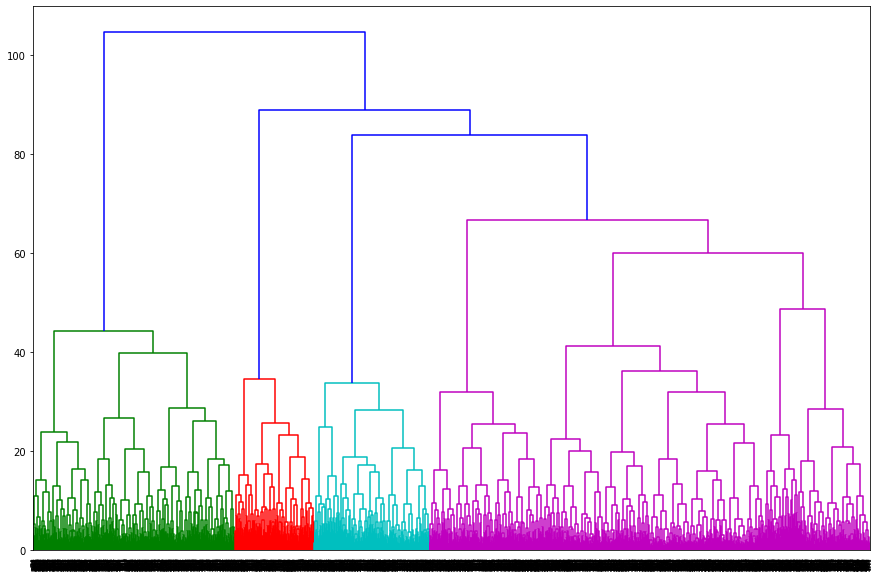

In [19]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
dendrogram(linked, orientation='top')
plt.show() 

На основе дендрограммы считаю, что оптимальное число кластров - 4 (4 разных цвета на графике).
Исходя из данного числа кластеров применяю к стандартизарованной выборке алгоритм K-means.

In [20]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_sc)

In [21]:
gym_churn['cluster'] = labels
gym_cluster = gym_churn.groupby('cluster').mean().reset_index()
display(gym_cluster)

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


Сохранила метки кластеров в таблицу с данными, cохранила среднее значение признаков по кластерам в отдельной таблице.

Самая высокая доля оттока клиентов в кластерах номер 1 - 55.98% и номер 0 - 26.68%, самая низкая в кластерах номер 3 - 2.96% и номер 2 - 9.27%.

У кластера с самой высокой долей оттока клиентов (номер 1) наименьшее количество клиентов, проживающих или работающих в районе, где находится фитнес-центр, при этом для кластера с самой низкой долей оттока (номер 3) это количество наибольшее, но в среднем разница по этому признаку между всеми кластерами небольшая.

У кластера с с самой низкой долей оттока наибольшее количество клиентов пришедших по акции "Приведи друга" или сотрудников компаний-партнеров фитнес-центра. У кластера с самой высокой долей оттока наименьшее количество клиентов пришедших по акции "Приведи друга", при этом в данном кластере не самое маленькое количество клиентов-сотрудников компаний-партнеров фитнес-центра.

У клиентов кластера с самой высокой долей оттока самый короткий срок абонемента, у клиентов кластера с самой низкой долей оттока - самый длинный.

Клиенты кластера с самой высокой долей оттока реже всех посещали занятия (в том числе групповые), клиенты кластера с самой низкой долей оттока чаще всех посещали групповые занятия, при этом у них не самая высокая частота посещения занятий.

У клиентов кластера с самой высокой долей оттока остается наименьшее количество месяцев до конца срока действия абонемента, при этом у клиентов этого кластера также самый короткий срок взаимодействия с фитнес-центром.

У клиентов кластера с самой низкой долей оттока наибольшее количество месяцев до конца срока действия абонемента, при этом у клиентов этого кластера также самый длинный срок взаимодействия с фитнес-центром.

Траты на сопутствующие услуги фитнес-центра ниже всего в кластере с самой высокой долей оттока клиентов, ниже всего - в кластере с самой низкой долей оттока клиентов.

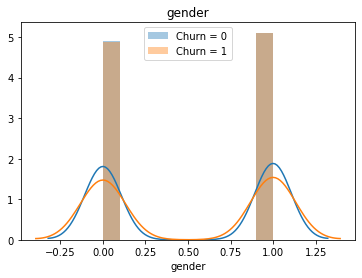

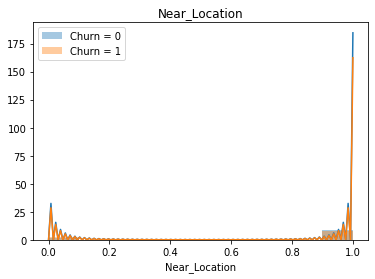

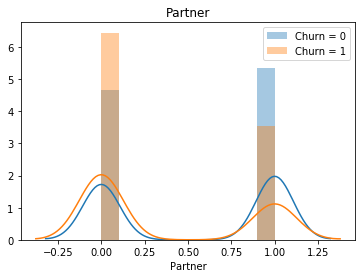

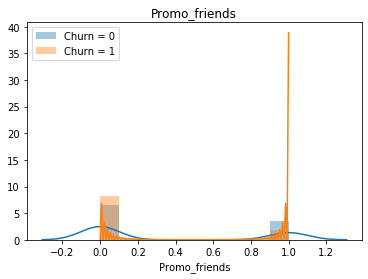

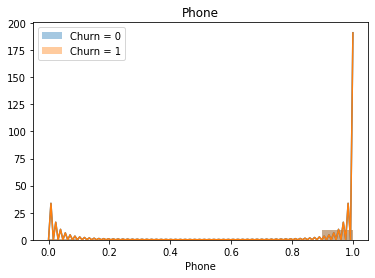

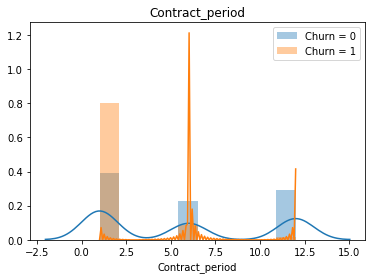

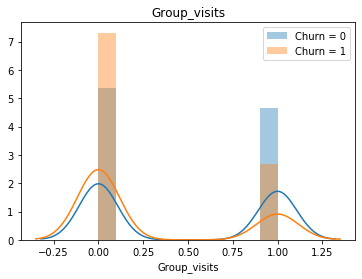

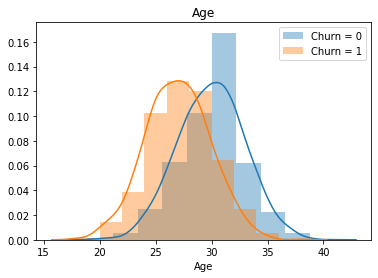

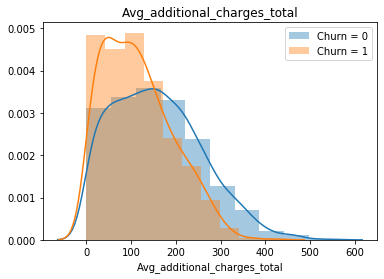

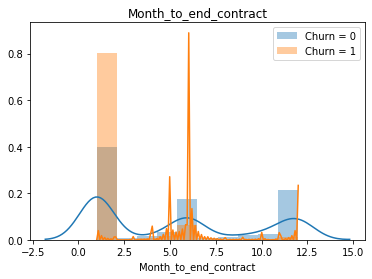

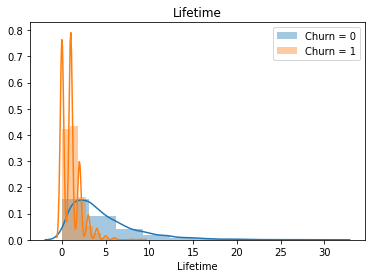

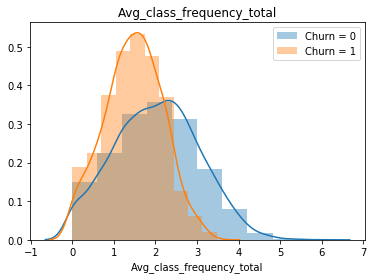

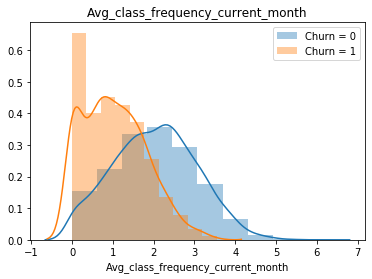

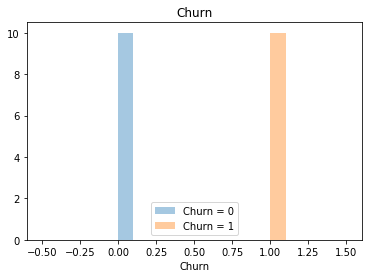

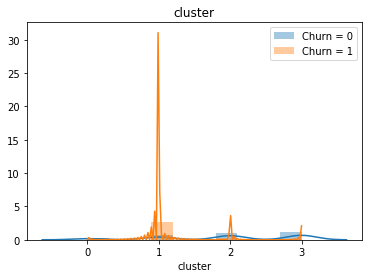

In [22]:
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()
 
feat_hist(gym_churn, 'Churn', gym_churn.columns)

Графики распределения признаков подтверждают все выводы, сделанные выше на основании средних значений признаков. Так же на графиках видно, что пол клиента и наличие в фитнес-центре его контактного телефона его не влияет на то, прекратит\не прекратит клиент посещение занятий в фитнес-центре.


<a id='resume2'></a> 

## Вывод
Самые стабильные клиенты фитнес-центра те, у которых фитнес-центр находится недалеко от работы (дома) (в том числе сотрудники компаний-партнеров фитнес-центра, или пришедшие по рекомендации в рамках акции "Приведи друга"), купившие абонемент на срок от 5 месяцев до года, посещающие тренировки (в том числе групповые) не реже двух раз в неделю, а также пользующиеся сопутствующими услугами: массажом, косметическим салоном и т.п. Также необходимо отметить лояльность клиентов - то есть если клиент не прекратил посещение фитнес-центра в первые два месяца, то с большой долей вероятности он будет продолжать ходить на тренировки.

Возможно для привлечения стабильных клиентов фитнес-центру нужно провести рекламную кампанию среди жителей окрестных домов, кварталов, ближайших офисных центров: для жилых домов это скорее флаеры в почту, для офисных центров - адресные предложения сотрудникам компаний.

Также порекомендовала бы провести опрос клиентов для понимания что влияет на их решение продолжать\не продолжать заниматься после первых пары месяцев посещения: возможно нехватает каких-то групповых тренировок, допуслуг (сауны, для расслабления после тренировок), или стоит немного поменять график занятий чтобы клиентам было комфортно добираться с работы на тренировки, или наоборот после тренировок домой.